<a href="https://colab.research.google.com/github/aya-bh/TP-apprentissage-artificiel/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn_som.som import SOM
from sklearn.metrics import confusion_matrix



In [145]:
# 1
print("1- Créer Un DataFrame :")
iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')
print(iris.sample(5))

1- Créer Un DataFrame :
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
20    21            5.4           3.4            1.7           0.2   
59    60            5.2           2.7            3.9           1.4   
28    29            5.2           3.4            1.4           0.2   
93    94            5.0           2.3            3.3           1.0   
145  146            6.7           3.0            5.2           2.3   

             Species  
20       Iris-setosa  
59   Iris-versicolor  
28       Iris-setosa  
93   Iris-versicolor  
145   Iris-virginica  


In [146]:
#2
print("2-Afficher les 10 premières lignes du DataFrame :")
print(iris.head(10))

2-Afficher les 10 premières lignes du DataFrame :
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


# Nouvelle section

In [147]:
#3
print("3-Afficher les dimensions du dataframe :")
print(iris.shape)

3-Afficher les dimensions du dataframe :
(150, 6)


4-visualiser les données en fonction de la longueur des pétales et de largeur des sépales :


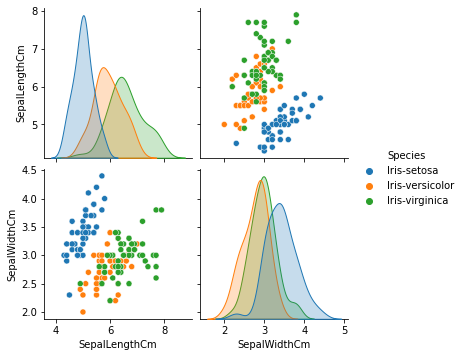

In [148]:
#4
print("4-visualiser les données en fonction de la longueur des pétales et de largeur des sépales :")
sns.pairplot(data=iris, vars=('SepalLengthCm','SepalWidthCm') , hue='Species')
plt.show()

In [149]:
#5 script python permettant de labelliser les différentes espèces d’iris :
local = iris[['Species']].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])
print(local.head(10))

   Species
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0


In [150]:
#6
print("6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels : ")
dataF=iris['Species']
data=iris.drop('Species',axis=1)
df=pd.concat([data,dataF],axis = 1)
df.head(10)

6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels : 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [151]:
#7
print("7-script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%) :")
y=df['Species']
x=df.drop('Species',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_test= x_test.drop('Id',axis=1)
x_train = x_train.drop('Id',axis=1)

7-script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%) :


In [152]:
#8
print("8-Afficher les 10 premières données d’apprentissage et celles de test : ")
print(x_train.head(10))



8-Afficher les 10 premières données d’apprentissage et celles de test : 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
47             4.6           3.2            1.4           0.2
83             6.0           2.7            5.1           1.6
34             4.9           3.1            1.5           0.1
2              4.7           3.2            1.3           0.2
71             6.1           2.8            4.0           1.3
84             5.4           3.0            4.5           1.5
115            6.4           3.2            5.3           2.3
65             6.7           3.1            4.4           1.4
129            7.2           3.0            5.8           1.6
39             5.1           3.4            1.5           0.2


In [153]:
print(y_train.head(10))


47         Iris-setosa
83     Iris-versicolor
34         Iris-setosa
2          Iris-setosa
71     Iris-versicolor
84     Iris-versicolor
115     Iris-virginica
65     Iris-versicolor
129     Iris-virginica
39         Iris-setosa
Name: Species, dtype: object


In [154]:
print(x_test.head(10))


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
40             5.0           3.5            1.3           0.3
42             4.4           3.2            1.3           0.2
118            7.7           2.6            6.9           2.3
101            5.8           2.7            5.1           1.9
114            5.8           2.8            5.1           2.4
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
89             5.5           2.5            4.0           1.3
112            6.8           3.0            5.5           2.1


In [155]:
print(y_test.head(10))

137     Iris-virginica
40         Iris-setosa
42         Iris-setosa
118     Iris-virginica
101     Iris-virginica
114     Iris-virginica
10         Iris-setosa
11         Iris-setosa
89     Iris-versicolor
112     Iris-virginica
Name: Species, dtype: object


In [156]:
#9
print("9-Ecrire un script python qui utilise un perceptron multicouche : ")
perceptron = MLPClassifier(solver='lbfgs', alpha=1e-05, hidden_layer_sizes=(3, 3), epsilon=0.07, max_iter=150)
print(perceptron.fit(x_train, y_train))


9-Ecrire un script python qui utilise un perceptron multicouche : 
MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')


In [157]:
#10
print("10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse : ")
print("score train")
trainScore = perceptron.score(x_train, y_train)
print(format(trainScore))


10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse : 
score train
0.6857142857142857


In [158]:
print("score test")
testScore = perceptron.score(x_test, y_test)
print(format(testScore))

score test
0.6222222222222222


In [159]:

predict=perceptron.predict(x_test)

print("accuracy")
print(metrics.accuracy_score(predict,y_test))


accuracy
0.6222222222222222


11-Afficher la matrice de confusion associée à notre cas : 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


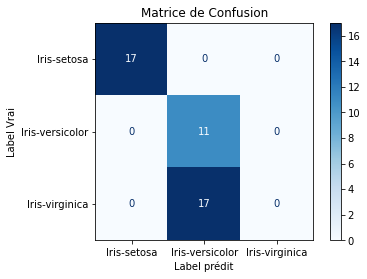

In [160]:
#11
print("11-Afficher la matrice de confusion associée à notre cas : ")
matriceconfision = plot_confusion_matrix(perceptron, x_test, y_test, cmap=plt.cm.Blues)
matriceconfision.ax_.set_title('Matrice de Confusion')
plt.xlabel('Label prédit')
plt.ylabel('Label Vrai')
plt.show()


In [161]:
#12
print("12-Selon les résultats affichés commenter le perceptron que vous avez utilisé : ")
print("le perceptron  peut modéliser la fonction.")



12-Selon les résultats affichés commenter le perceptron que vous avez utilisé : 
le perceptron  peut modéliser la fonction.


13-ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7 : 


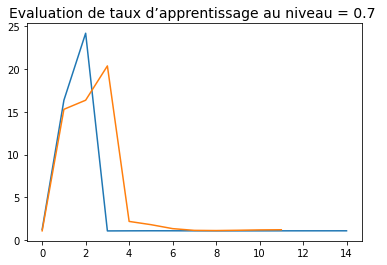

In [162]:
#13
print("13-ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7 : ")
classifier = MLPClassifier(solver='sgd' , max_iter=150, random_state=0,learning_rate_init=0.7,verbose=0 )
classifier.fit(x_train, y_train)

plt.title("Evaluation de taux d’apprentissage au niveau = 0.7 ",fontsize=14)
plt.plot(classifier.loss_curve_)
classifier.fit(x_test, y_test)
plt.plot(classifier.loss_curve_)


In [163]:
#14
print("14-étudier la variation du paramètre de taux d’apprentissage : ")
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },

]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]



14-étudier la variation du paramètre de taux d’apprentissage : 


In [164]:
mlpsApp = []
for label, param in zip(labels, params):
    print("Apprentissage:%s" % label)
    mlpApp = MLPClassifier(random_state=0, **param)
    mlpApp.fit(x_train, y_train)
    mlpsApp.append(mlpApp)
    print("Score de l'ensemble d'apprentissage: %f" % mlpApp.score(x_train, y_train))



Apprentissage:constant learning-rate_0.2
Score de l'ensemble d'apprentissage: 0.371429
Apprentissage:constant learning-rate_0.7
Score de l'ensemble d'apprentissage: 0.371429
Apprentissage:invscaling learning-rate_0.2
Score de l'ensemble d'apprentissage: 0.971429
Apprentissage:invscaling learning-rate_0.7
Score de l'ensemble d'apprentissage: 0.685714
Apprentissage:adam
Score de l'ensemble d'apprentissage: 0.980952


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [165]:
mlpsTest=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlpTest=MLPClassifier(random_state=0,**param)
  mlpTest.fit(x_test,y_test)
  mlpsTest.append(mlpTest)
  print("Score de l'ensemble de test : %f" % mlpTest.score(x_test,y_test))


training:constant learning-rate_0.2
Score de l'ensemble de test : 0.377778
training:constant learning-rate_0.7
Score de l'ensemble de test : 0.377778
training:invscaling learning-rate_0.2
Score de l'ensemble de test : 1.000000
training:invscaling learning-rate_0.7
Score de l'ensemble de test : 1.000000
training:adam
Score de l'ensemble de test : 1.000000


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


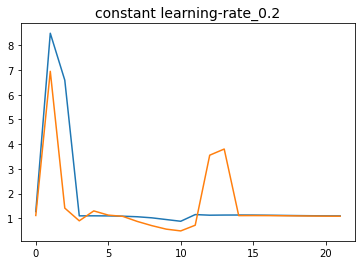

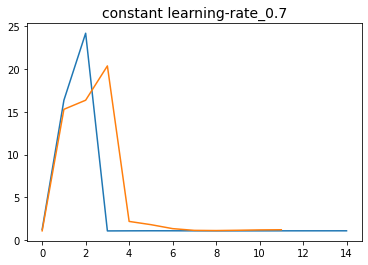

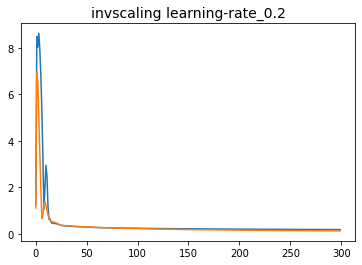

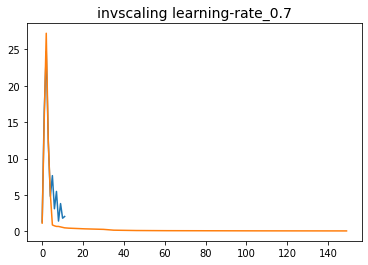

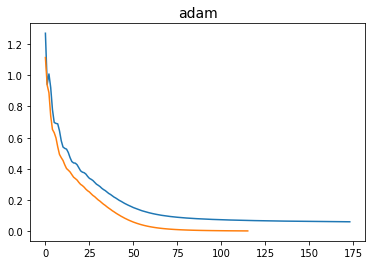

In [166]:
for mlpApp, mlpTest, label, args in zip(mlpsApp, mlpsTest,labels,plot_args):
  plt.plot(mlpApp.loss_curve_ ,  label=label)
  plt.plot(mlpTest.loss_curve_ , label=label)
  plt.title(label,fontsize=14)

  plt.show()



In [167]:
#15
print("15-fixer un nombre d’itération égale à 10 fois le nombre fixé au début : ")
print("15- On constate le phénomène 'overfitting'.On peut le surmonter par plusieur méthode : par exemple Ajouter des données d’entraînements qui permet d’augmenter la taille des données d’entraînements ")


15-fixer un nombre d’itération égale à 10 fois le nombre fixé au début : 
15- On constate le phénomène 'overfitting'.On peut le surmonter par plusieur méthode : par exemple Ajouter des données d’entraînements qui permet d’augmenter la taille des données d’entraînements 


16-Tester d’autres classifieurs de type réseau de neurones : 


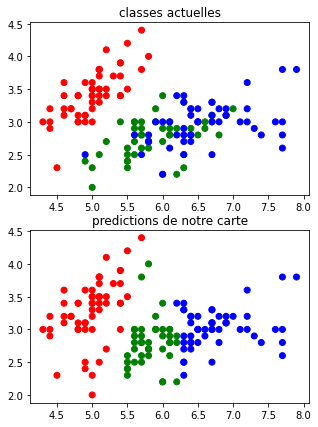

In [168]:
#16
print("16-Tester d’autres classifieurs de type réseau de neurones : ")

iris=datasets.load_iris()
iris_data=iris.data
iris_label=iris.target
iris_data=iris_data[:,:2]
som=SOM(m=3, n=1, dim=2, random_state=1234)
som.fit(iris_data)
predictions=som.predict(iris_data)
fig,ax =plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x=iris_data[:,0]
y=iris_data[:,1]
colors=['red','green','blue']
ax[0].scatter(x,y,c=iris_label,cmap=ListedColormap(colors))
ax[0].title.set_text('classes actuelles')
ax[1].scatter(x,y,c=predictions,cmap=ListedColormap(colors))
ax[1].title.set_text('predictions de notre carte')


In [169]:
#17
print("17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ?")
print("Non il n'est pas intéressant d’avoir un réseau de neurones récurrent car pour  Les valeurs d'une action dépendent largement des valeurs qu'elle avait précédemment.")


17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ?
Non il n'est pas intéressant d’avoir un réseau de neurones récurrent car pour  Les valeurs d'une action dépendent largement des valeurs qu'elle avait précédemment.
